In [2]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt
from itertools import permutations
import random
import seaborn as sns
import linear2

In [3]:
utils.set_random_seed(1)
B_true = utils.simulate_dag(40, 40, "BP")
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, 39, "gauss", noise_scale=np.random.uniform(1, 5, 40))
linear.notears_linear(X, lambda1=0, loss_type="l2", W_true=W_true)

(array([[ 0.00000000e+00,  1.11959479e-07,  7.18203598e-08, ...,
          1.40530668e-06,  2.33788371e-07, -4.44521493e-09],
        [ 7.61961513e-01,  0.00000000e+00, -6.05935280e-08, ...,
         -3.01311275e-01, -4.81008583e-07, -7.14265830e-08],
        [ 1.36079008e+00, -1.10655479e-01,  0.00000000e+00, ...,
          1.14590082e+00, -1.74480794e-01, -3.88783756e-01],
        ...,
        [ 2.51080986e-01,  4.09610164e-08, -2.69080536e-08, ...,
          0.00000000e+00, -5.83456989e-08,  8.25479761e-08],
        [-1.89653942e-01, -1.41346003e-01, -1.06384287e-08, ...,
         -1.30388950e+00,  0.00000000e+00,  9.40428049e-08],
        [ 6.89200920e+00,  8.70288095e-01,  3.66106957e-08, ...,
          8.98375244e+00,  5.12419385e-01,  0.00000000e+00]]),
 62.65678284108878,
 62.65678284108878,
 62.660298812369824,
 62.66822482442451,
 2.651781016993482e-09)

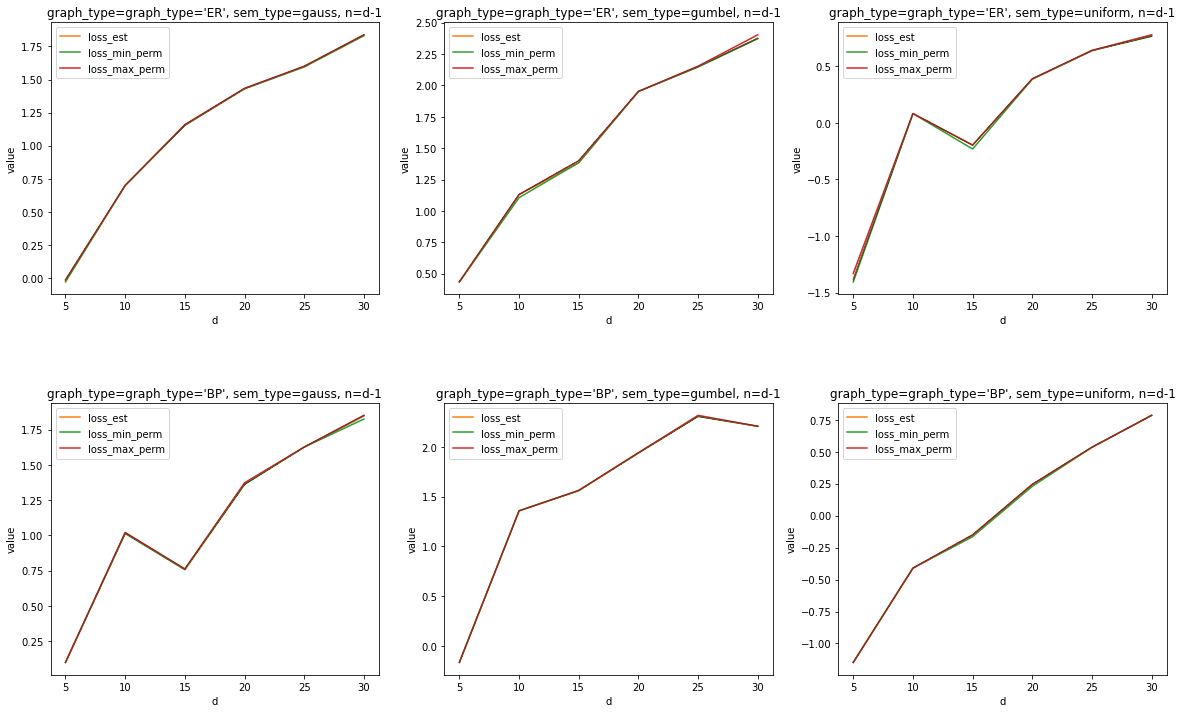

In [3]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
graphtypes = ["ER", "BP"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for g, graph_type in enumerate(graphtypes):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(int(5000+3*g))+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[g, i]
        for p in range(4):
            if p >0:
                ax.plot(ds,np.log(result_d[:,p]), marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, np.log(result_d[:,p+4]), marker='', alpha=0.005, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'graph_type={graph_type=}, sem_type={sem_type}, n=d-1')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_3.png")
plt.show()

## Three-node template

In [5]:
def restore_from_per(per_ind, W):
    W_re = np.zeros(W.shape)
    for i in range(len(per_ind)):
        for j in range(len(per_ind)):
            W_re[i, j] = W[per_ind[i], per_ind[j]]
    return W_re

In [ ]:
def estimate_template(sem_type, seed=1, lambda1=0, loss_type='l2', BB=100):
    print("=============processing seed=", seed, "================")
    d = 3
    #utils.set_random_seed(seed)
    n = 2 * d
    s0 = d-1
    print("n, d, s0, em_type, lambda1, loss_type", "-", n, d, s0, sem_type, lambda1, loss_type)
    
    B_true = np.zeros([3, 3])
    for i in range(3):
        if (i+1) % 3 == 0:
            B_true[i-1, i] = 1
            B_true[i-2, i] = 1
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=np.abs(np.random.normal(1, 1, d)))

    # B = np.min([math.factorial(d), BB])
    B = 6
    results = np.zeros([5, B+2])
    results[0, 0] = 0.5 / X.shape[0] * ((X-X@W_true) ** 2).sum()
    #all_perm = list(permutations(range(X.shape[1])))
    #utils.set_random_seed(seed+d)
    inds = [i for i in range(d)]
    w_est = linear.notears_linear(X, W_true=W_true, lambda1=0, loss_type=loss_type)
    print("W_true=========================")
    print(W_true)
    print("permutation====================")
    print(w_est)
    count = 0
    for a1 in permutations([0,1,2]):
        count += 1
        new_ind = list(a1) 
        w_est = linear.notears_linear(X[:, new_ind], W_true=W_true, lambda1=0, loss_type="l2")
        print(w_est)


In [ ]:
def estimate_template(sem_type, seed=1, lambda1=0, loss_type='l2', BB=100, noise_scale=None):
    print("=============processing seed=", seed, "================")
    #utils.set_random_seed(seed)
    print("=============processing seed=", seed, "================")
    d = 3
    #utils.set_random_seed(seed)
    n = 2 * d
    s0 = d-1
    print("n, d, s0, em_type, lambda1, loss_type", "-", n, d, s0, sem_type, lambda1, loss_type)
    
    B_true = np.zeros([3, 3])
    for i in range(3):
        if (i+1) % 3 == 0:
            B_true[i-1, i] = 1
            B_true[i-2, i] = 1
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=noise_scale)

    # B = np.min([math.factorial(d), BB])
    B = 6
    results = np.zeros([5, B+2])
    results[0, 0] = 0.5 / X.shape[0] * ((X-X@W_true) ** 2).sum()

    #all_perm = list(permutations(range(X.shape[1])))
    #utils.set_random_seed(seed+d)
    inds = [i for i in range(d)]
    w_est, _, _, _, _, _ = linear.notears_linear(X, W_true=W_true, lambda1=0, loss_type=loss_type)
    
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    axes_ = axes.ravel()
    cax = axes_[0].imshow(W_true, cmap='viridis') 
    axes_[0].set_title("True W")
    plt.colorbar(cax, ax=axes_[0]) 
    count = 2
    axes_[1].axis('off')
    axes_[2].axis('off')
    for a1 in permutations(range(3)):
        count += 1
        new_ind = a1
        w_est, _, _, _, _, _ = linear.notears_linear(X[:, new_ind], W_true=W_true, lambda1=0, loss_type="l2")
        w_est_re = restore_from_per(new_ind, w_est)
        cax = axes_[count].imshow(w_est_re, cmap='viridis') 
        plt.colorbar(cax, ax=axes_[count]) 
        axes_[count].set_title("Estimated W")
    plt.savefig("./results_loss2/3node_perm_1.png")
    plt.show()

=============processing seed= 1 ================
=============processing seed= 1 ================
n, d, s0, em_type, lambda1, loss_type - 6 3 2 exp 0 l2


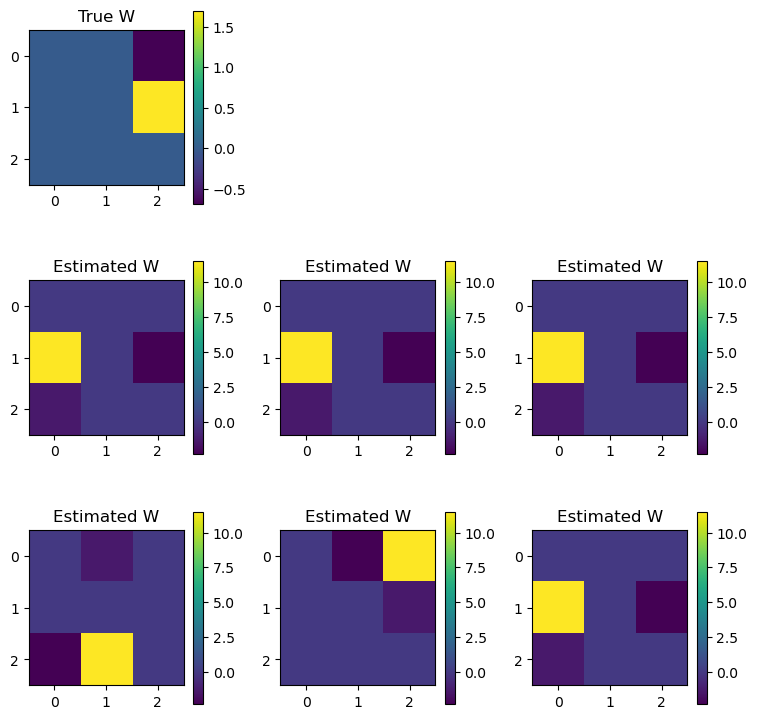

In [20]:
estimate_template("exp", seed=1, lambda1=0, loss_type='l2', BB=100, noise_scale=None)

In [22]:
def estimate_template(sem_type, seed=1, lambda1=0, loss_type='l2', BB=100):
    print("=============processing seed=", seed, "================")
    #utils.set_random_seed(seed)
    print("=============processing seed=", seed, "================")
    d = 3
    #utils.set_random_seed(seed)
    n = 2 * d
    s0 = d-1
    print("n, d, s0, em_type, lambda1, loss_type", "-", n, d, s0, sem_type, lambda1, loss_type)
    
    B_true = np.zeros([3, 3])
    for i in range(3):
        if (i+1) % 3 == 0:
            B_true[i-1, i] = 1
            B_true[i-2, i] = 1
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=np.random.exponential(1, d))
    model = linear2.DagmaLinear(loss_type=loss_type)

    # B = np.min([math.factorial(d), BB])
    B = 6
    results = np.zeros([5, B+2])
    results[0, 0] = 0.5 / X.shape[0] * ((X-X@W_true) ** 2).sum()

    #all_perm = list(permutations(range(X.shape[1])))
    #utils.set_random_seed(seed+d)
    inds = [i for i in range(d)]
    w_est, _ = model.fit(X, lambda1=0)
    
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    axes_ = axes.ravel()
    cax = axes_[0].imshow(W_true, cmap='viridis') 
    axes_[0].set_title("True W")
    plt.colorbar(cax, ax=axes_[0]) 
    count = 2
    axes_[1].axis('off')
    axes_[2].axis('off')
    for a1 in permutations(range(3)):
        count += 1
        new_ind = a1
        w_est, _ = model.fit(X[:, new_ind], lambda1=0)
        w_est_re = restore_from_per(new_ind, w_est)
        cax = axes_[count].imshow(w_est_re, cmap='viridis') 
        plt.colorbar(cax, ax=axes_[count]) 
        axes_[count].set_title("Estimated W")
    plt.savefig("./results_loss2/3node_perm_2.png")
    plt.show()

=============processing seed= 1 ================
=============processing seed= 1 ================
n, d, s0, em_type, lambda1, loss_type - 6 3 2 exp 0 l2


  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

  0%|          | 0/180000.0 [00:00<?, ?it/s]

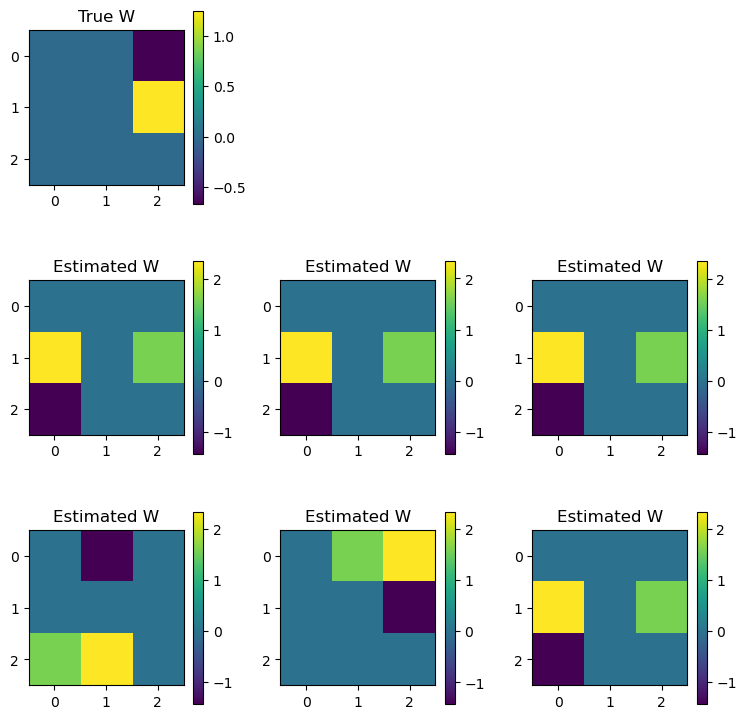

In [23]:
estimate_template("exp", seed=1, lambda1=0, loss_type='l2', BB=100)

 - Uniform noise(0.5, 3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


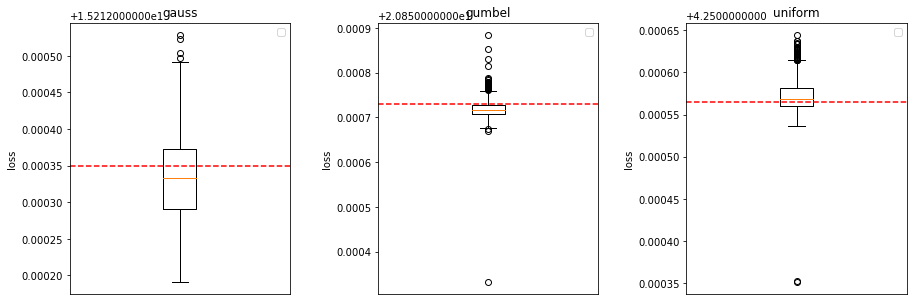

In [30]:
semtypes = ["gauss", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result = pd.read_csv("./results_loss2/result_"+str(5025)+"_"+sem_type+"_"+str(12)+".csv")

    ax = axs[i]
    ax.boxplot(result.iloc[2:, 0])
    #ax.axhline(result.iloc[0, 0], color="grey", linestyle="--")
    ax.axhline(result.iloc[1, 0], color="red", linestyle="--")
    #ax.set_xlabel('d')
    ax.set_ylabel("loss")
    ax.set_xticks([])
    ax.set_title(f'{sem_type}')
    ax.legend()
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.savefig("./results_loss2/3node_loss_perm_1.png")
plt.suptitle
plt.show()

 - Gaussian noise(1,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


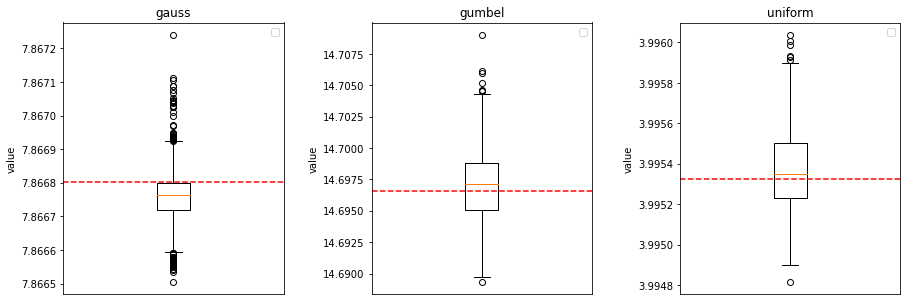

In [38]:
semtypes = ["gauss", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result = pd.read_csv("./results_loss2/result_"+str(5027)+"_"+sem_type+"_"+str(12)+".csv")

    ax = axs[i]
    ax.boxplot(result.iloc[2:, 0])
    #ax.axhline(result.iloc[0, 0], color="grey", linestyle="--")
    ax.axhline(result.iloc[1, 0], color="red", linestyle="--")
    #ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_xticks([])
    ax.set_title(f'{sem_type}')
    ax.legend()
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.savefig("./results_loss2/loss_12node.png")
plt.suptitle
plt.show()

 - DAGMA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


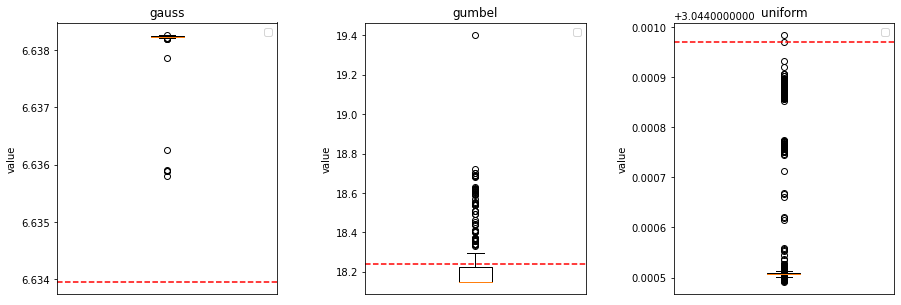

In [22]:
semtypes = ["gauss", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result = pd.read_csv("./results_loss2/result_"+str(5037)+"_"+sem_type+"_"+str(12)+".csv")

    ax = axs[i]
    ax.boxplot(result.iloc[2:, 0])
    #ax.axhline(result.iloc[0, 0], color="grey", linestyle="--")
    ax.axhline(result.iloc[1, 0], color="red", linestyle="--")
    #ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_xticks([])
    ax.set_title(f'{sem_type}')
    ax.legend()
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.savefig("./results_loss2/loss_12node_2.png")
plt.suptitle
plt.show()

## Non-constant variance

- dagma

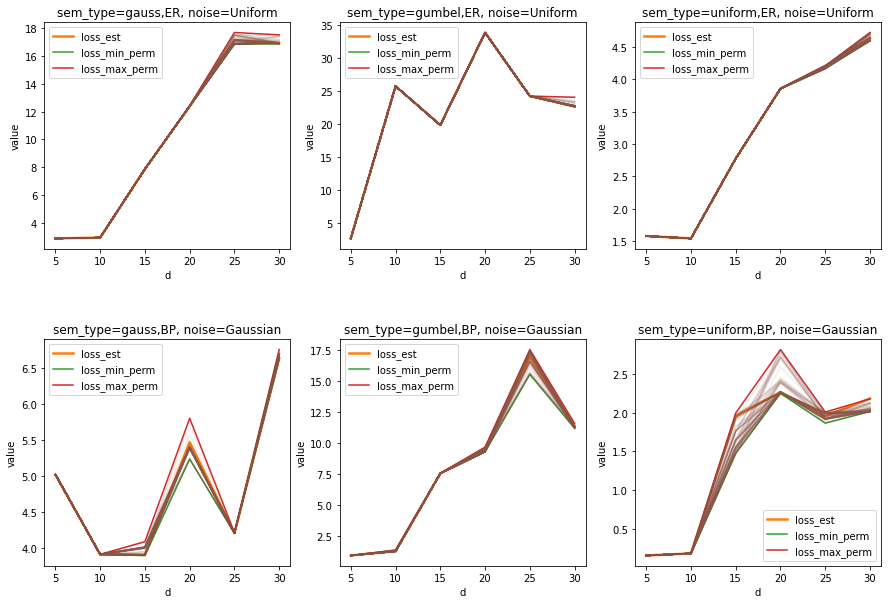

In [28]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
graphtypes = ["ER"] + ["BP"] 
dists = ["Uniform", "Gaussian"] 
seeds = [5023, 5032]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for graph_type, dist, s in zip(graphtypes, dists, range(2)):
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[s, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_dagma_noncon.png")
plt.suptitle
plt.show()
# 5022: notears + uniform
# 5023: dagma + uniform
# 5025: template+uni+all perm
#5026:notears+bp+uni
#5027:template+gaussian
#5028: logistics
#5029:notears+gaussian

 - NOTEARS

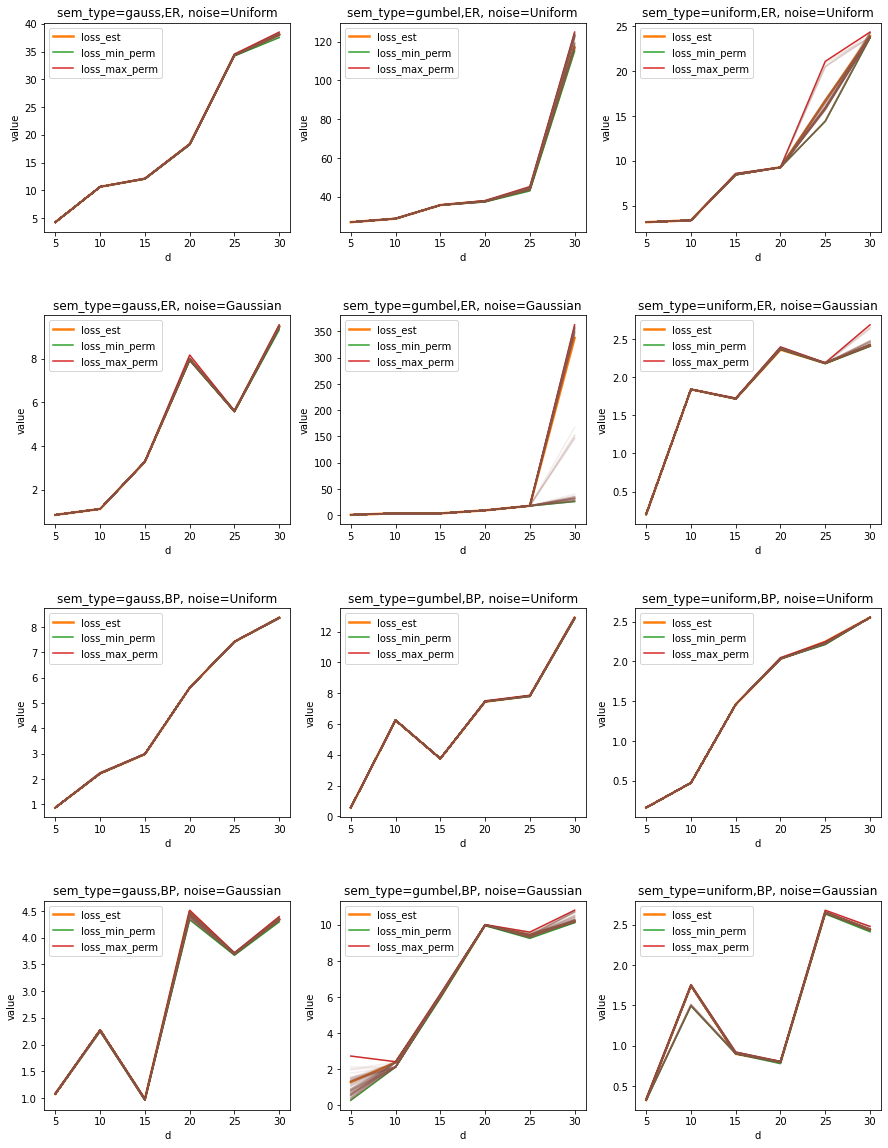

In [11]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
graphtypes = ["ER"] * 2 + ["BP"] * 2
dists = ["Uniform", "Gaussian"] * 2
seeds = [5022, 5030, 5029, 5031]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for graph_type, dist, s in zip(graphtypes, dists, range(4)):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[s, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type},{graph_type}, noise={dist}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_noncon.png")
plt.suptitle
plt.show()
# 5022: notears + uniform
# 5023: dagma + uniform
# 5025: template+uni+all perm
#5026:notears+bp+uni
#5027:template+gaussian
#5028: logistics
#5029:notears+uni+bp

## Orientation identification

In [24]:
def estimate_template_heterovar(d, graph_type, sem_type, seed=1, lambda1=0, loss_type='l2', BB=100):
    print("=============processing seed=", seed, "================")
    #utils.set_random_seed(seed)
    n = 2 * d
    s0 = d-1
    print("n, d, s0, graph_type, sem_type, lambda1, loss_type", "-", n, d, s0, graph_type, sem_type, lambda1, loss_type)
    
    B_true = utils.simulate_dag(d, d, graph_type)
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=np.random.uniform(0.5, 3, d))

    # B = np.min([math.factorial(d), BB])
    B = 24
    results = np.zeros([5, B+2])
    results[0, 0] = 0.5 / X.shape[0] * ((X-X@W_true) ** 2).sum()
    #all_perm = list(permutations(range(X.shape[1])))
    #utils.set_random_seed(seed+d)
    inds = [i for i in range(d)]
    w_est, _, _, _, _, _ = linear.notears_linear(X, W_true=W_true, lambda1=0, loss_type=loss_type)
    # print("W_true=========================")
    # print(W_true)
    # print("permutation====================")
    # #print(scipy.spatial.distance.hamming(W_true.flatten(), w_est.flatten(), w=None))
    # print(w_est)
    fig, axes = plt.subplots(5, 5, figsize=(25, 25))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  
    axes_ = axes.ravel()
    cax = axes_[0].imshow(W_true, cmap='viridis') 
    plt.colorbar(cax, ax=axes_[0]) 
    count = 0
    for a1 in permutations(range(4)):
        count += 1
        new_ind = a1
        w_est, _, _, _, _, _ = linear.notears_linear(X[:, new_ind], W_true=W_true, lambda1=0, loss_type="l2")
        w_est_re = restore_from_per(new_ind, w_est)
        cax = axes_[count].imshow(w_est_re, cmap='viridis') 
        plt.colorbar(cax, ax=axes_[count]) 
    plt.show()


=============processing seed= 1 ================
n, d, s0, graph_type, sem_type, lambda1, loss_type - 8 4 3 ER gauss 0 l2


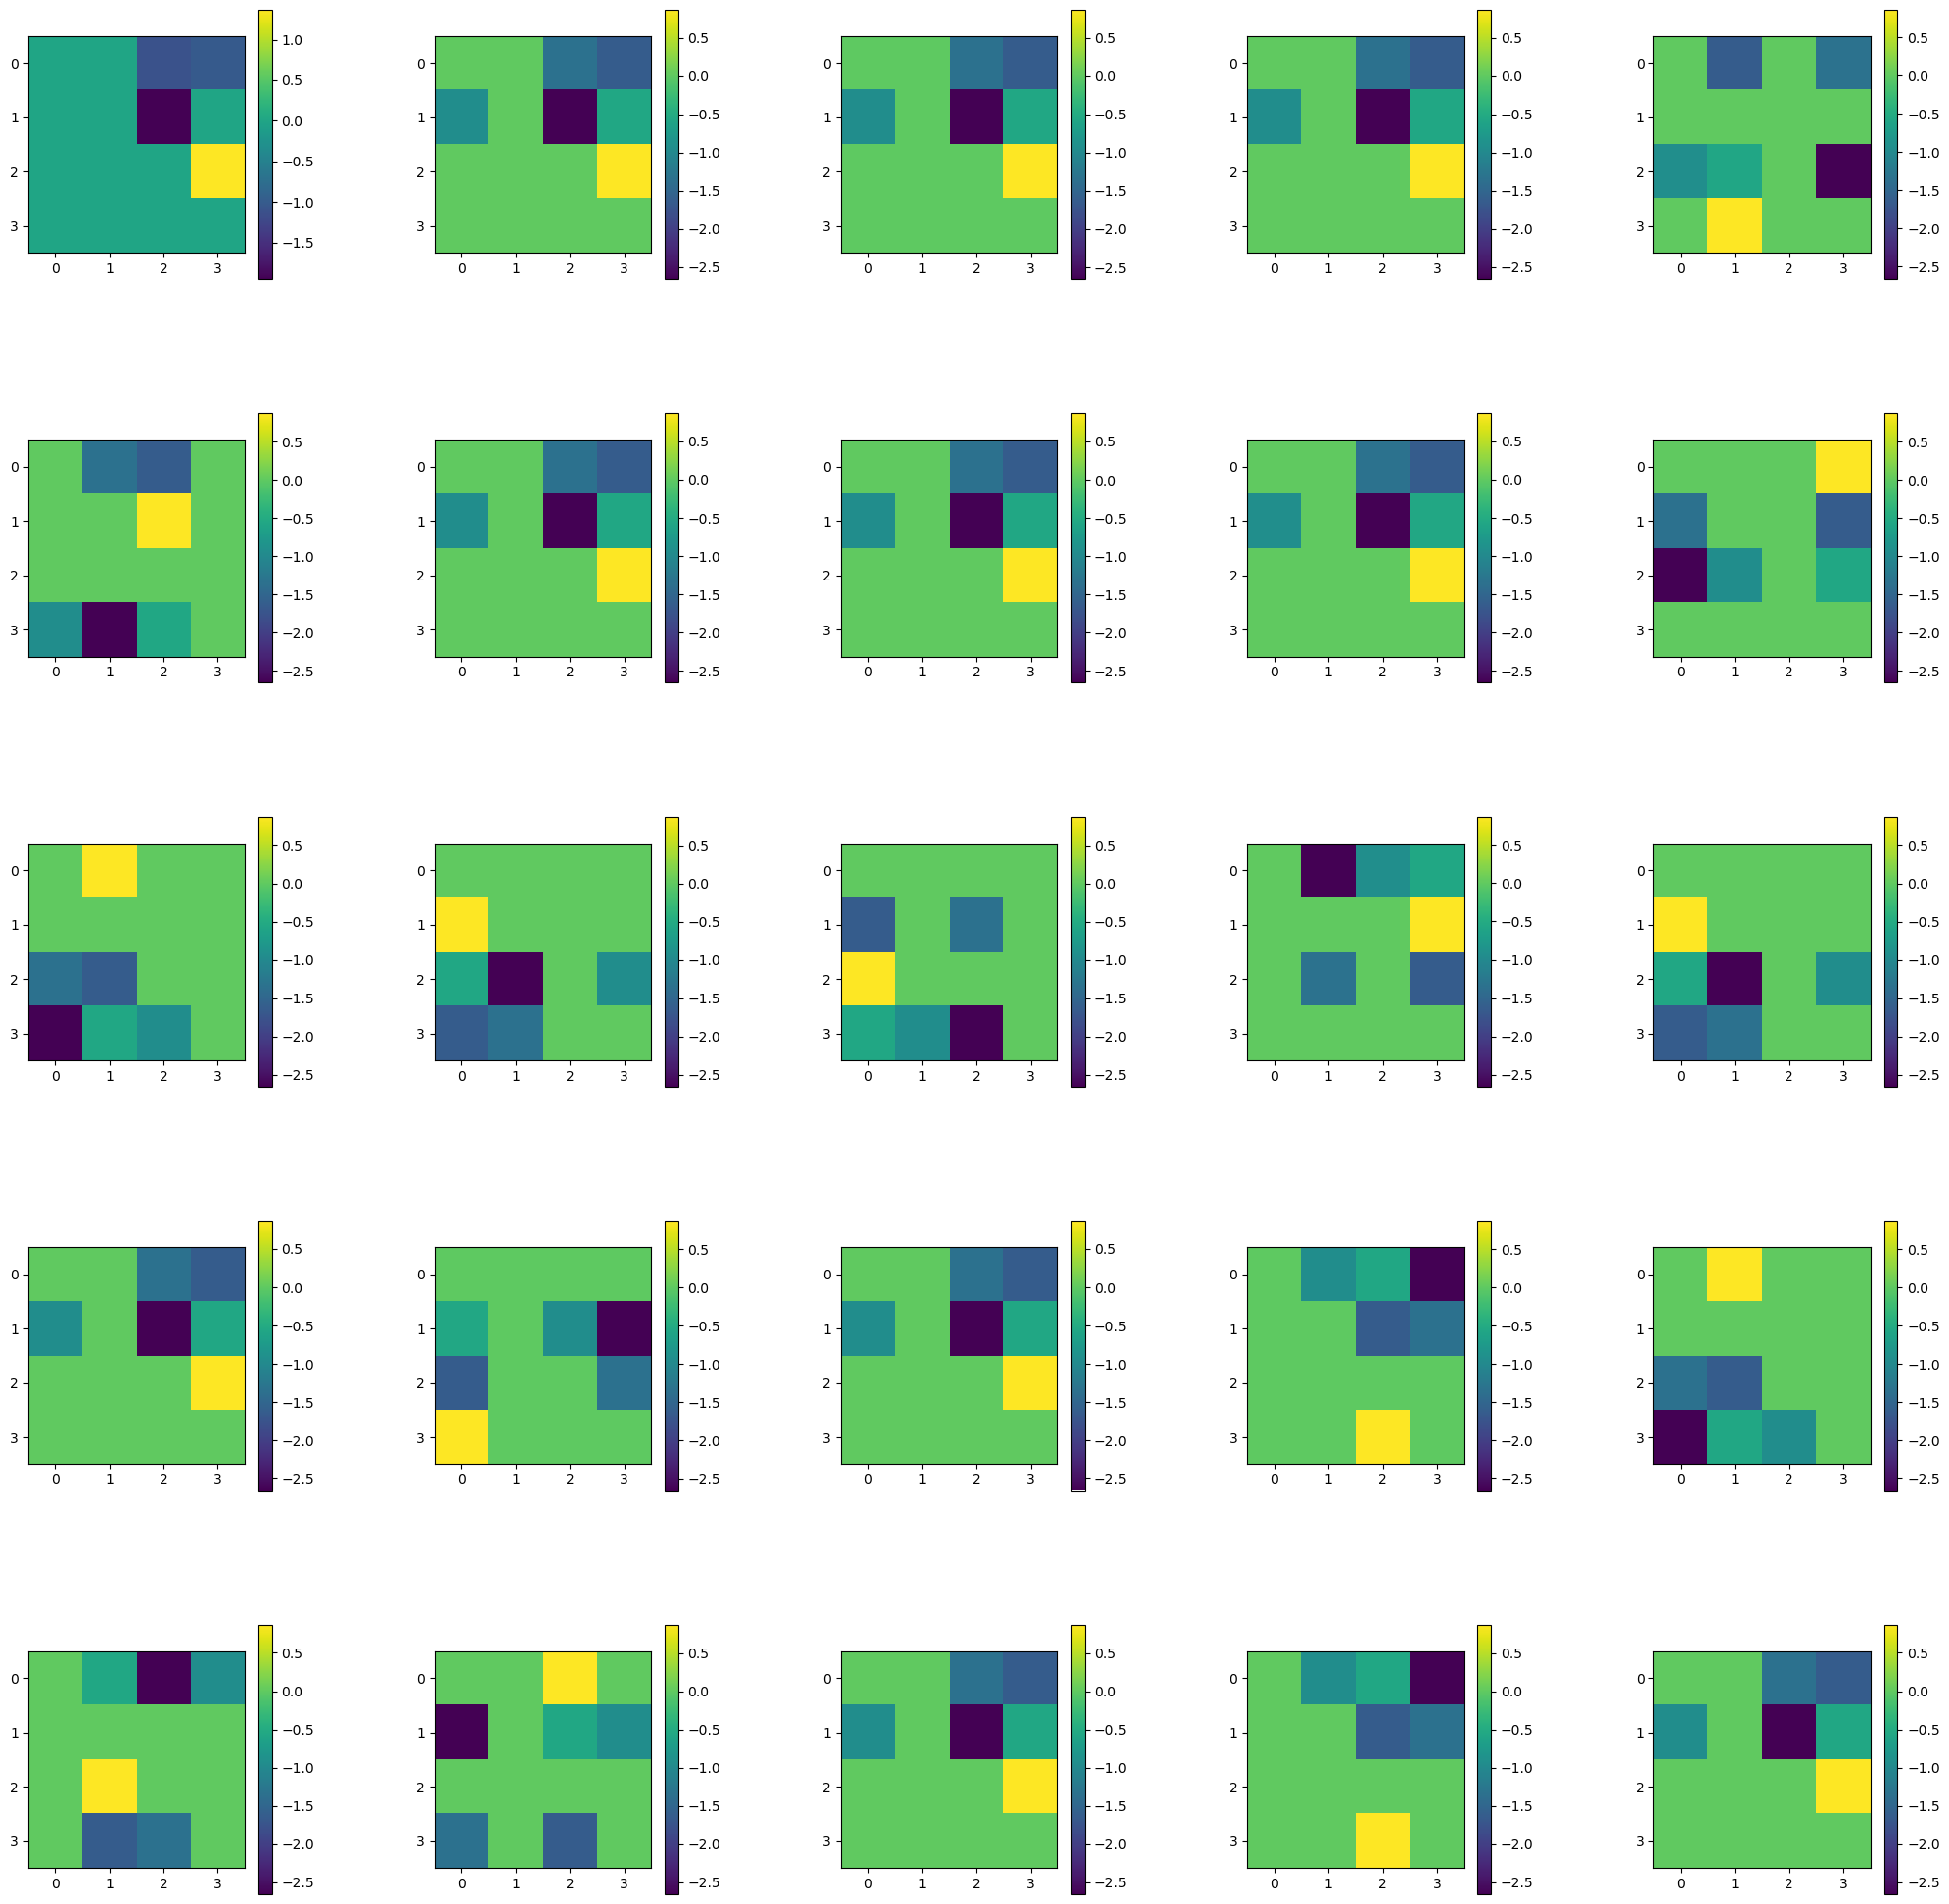

In [25]:
estimate_template_heterovar(4, "ER", "gauss")

In [26]:
def estimate_template_homovar(d, graph_type, sem_type, seed=1, lambda1=0, loss_type='l2', BB=100):
    print("=============processing seed=", seed, "================")
    #utils.set_random_seed(seed)
    n = 2 * d
    s0 = d-1
    print("n, d, s0, graph_type, sem_type, lambda1, loss_type", "-", n, d, s0, graph_type, sem_type, lambda1, loss_type)
    
    B_true = utils.simulate_dag(d, d, graph_type)
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type, noise_scale=None)

    # B = np.min([math.factorial(d), BB])
    B = 24
    results = np.zeros([5, B+2])
    results[0, 0] = 0.5 / X.shape[0] * ((X-X@W_true) ** 2).sum()
    #all_perm = list(permutations(range(X.shape[1])))
    #utils.set_random_seed(seed+d)
    inds = [i for i in range(d)]
    w_est, _, _, _, _, _  = linear.notears_linear(X, W_true=W_true, lambda1=0, loss_type=loss_type)
    # print("W_true=========================")
    # print(W_true)
    # print("permutation====================")
    # #print(scipy.spatial.distance.hamming(W_true.flatten(), w_est.flatten(), w=None))
    # print(w_est)
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    axes_ = axes.ravel()
    cax = axes_[0].imshow(W_true, cmap='viridis') 
    plt.colorbar(cax, ax=axes_[0])
    axes_[0].set_title("True W")
    count = 0
    for a1 in permutations(range(4)):
        count += 1
        new_ind = a1
        w_est, _, _, _, _, _  = linear.notears_linear(X[:, new_ind], W_true=W_true, lambda1=0, loss_type="l2")
        w_est_re = restore_from_per(new_ind, w_est)
        cax = axes_[count].imshow(w_est_re, cmap='viridis') 
        plt.colorbar(cax, ax=axes_[count])
        axes_[count].set_title("Estimated W")
    plt.savefig("./results_loss2/4node_perm.png")
    plt.show()


=============processing seed= 1 ================
n, d, s0, graph_type, sem_type, lambda1, loss_type - 8 4 3 ER gauss 0 l2


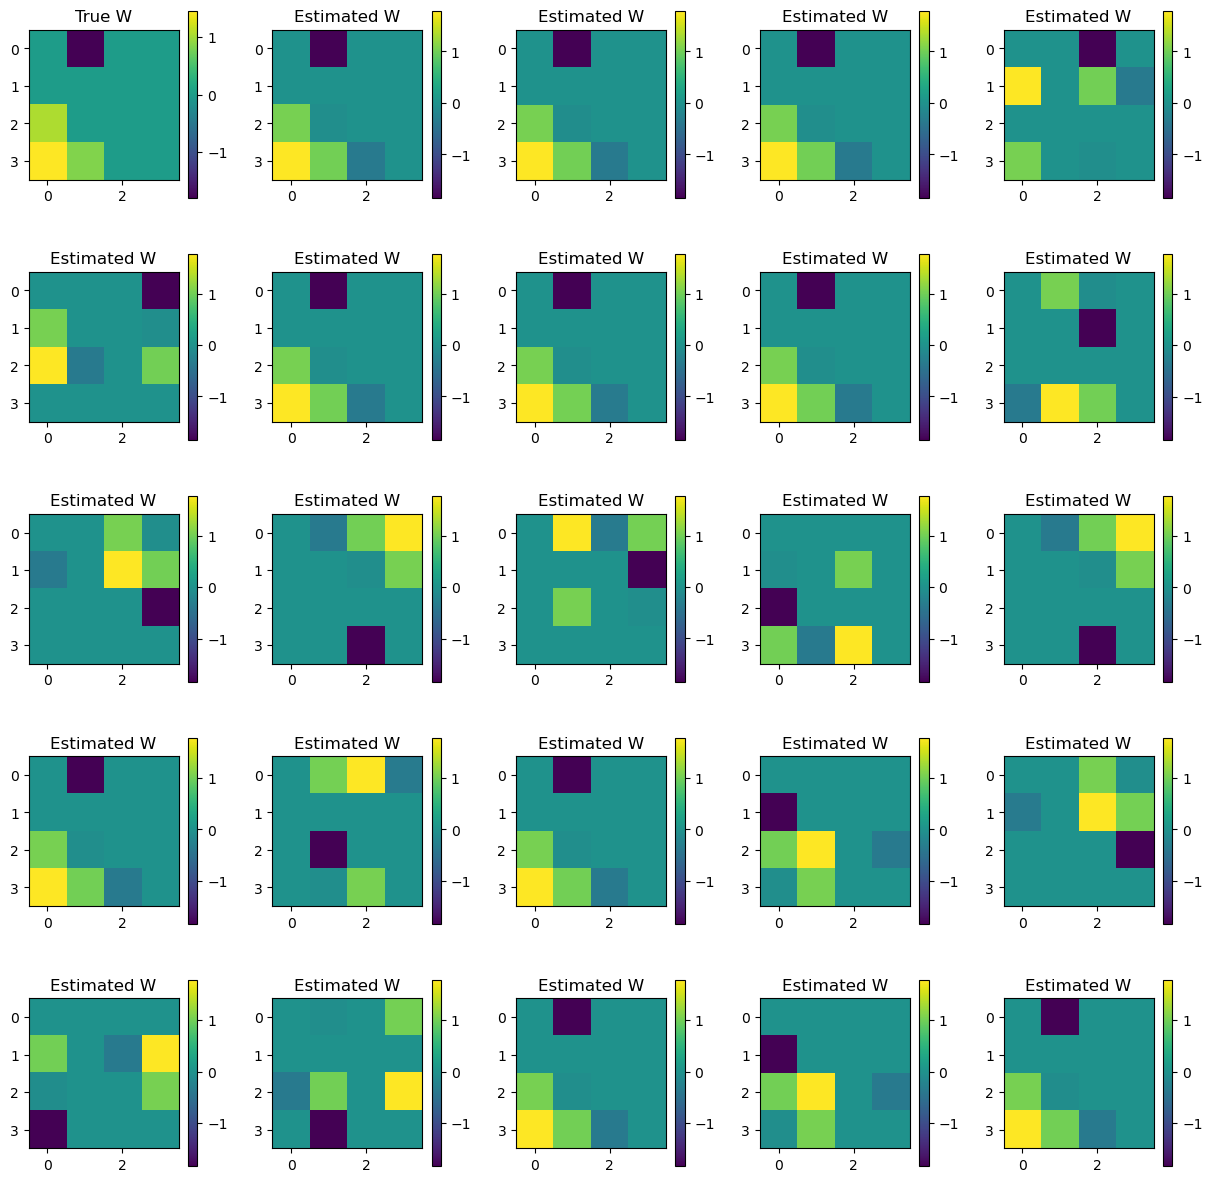

In [27]:
estimate_template_homovar(4, "ER", "gauss")

## Discrete

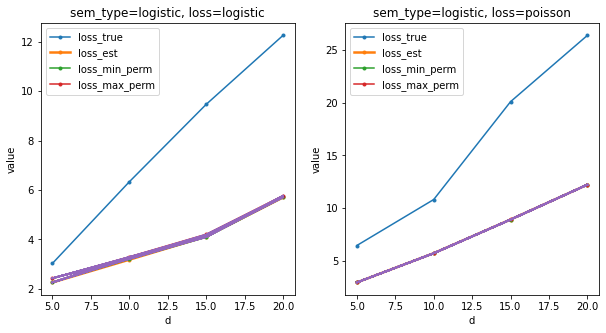

In [31]:
semtypes = ["logistic"] * 2
ds = [5, 10, 15, 20]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
seeds = [5028, 5038]
losses = ["logistic", "poisson"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]

for loss_, s in zip(losses, range(2)):
    result_d = np.zeros([len(ds), len(loss_f)+100])
    for j, d in enumerate(ds):
        result = pd.read_csv("./results_loss2/result_"+str(seeds[s])+"_"+semtypes[s]+"_"+str(d)+".csv")
        result_d[j, :2] = result.iloc[:2, 0]
        min_ind = np.argmin(result.iloc[2:, 0]) + 2
        result_d[j, 2] = result.iloc[min_ind, 0]
        max_ind = np.argmax(result.iloc[2:, 0]) + 2
        result_d[j, 3] = result.iloc[max_ind, 0]
        for k in range(100):
            result_d[j, k+4] = result.iloc[k+2, 0]

    ax = axs[s]
    for p in range(4):
        if p >-1:
            if p ==1:
                ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p), linewidth=2.5)
            else:
                ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p))
    for p in range(100):
        ax.plot(ds, result_d[:,p+4], marker='', alpha=1, color=colormap(4))
    ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type=logistic, loss={loss_}')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_log.png")
plt.suptitle
plt.show()

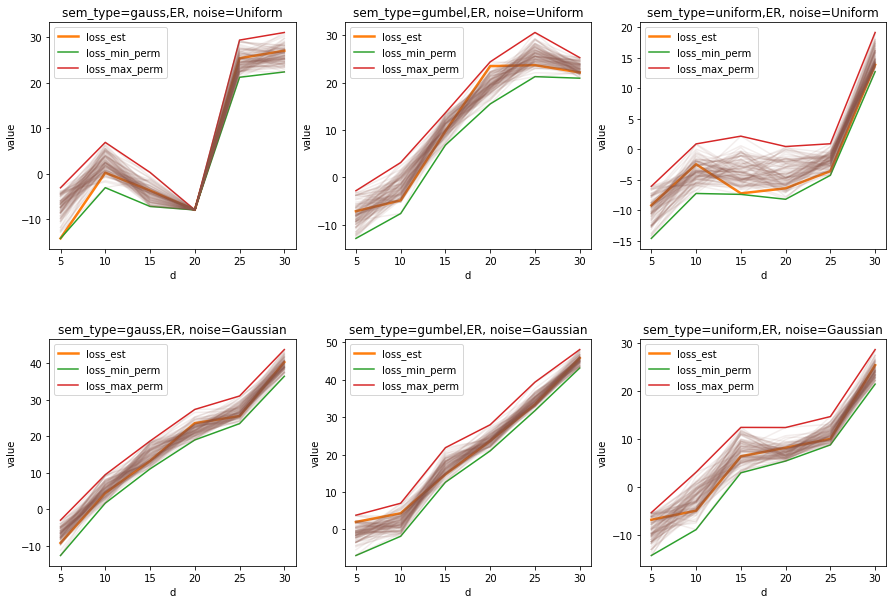

In [3]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
graphtypes = ["ER"] *2 
dists = ["Uniform", "Gaussian"] 
seeds = [5040, 5041]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for graph_type, dist, s in zip(graphtypes, dists, range(2)):
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[s, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_golem_noncon.png")
plt.suptitle
plt.show()